<a href="https://colab.research.google.com/github/tpattanaik/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**

**In this project, we are going to explore and analyze a dataset which contains specifications of two thousand mobile phones and try to predict optimum price ranges for a list of mobile phones in the market by applying various machine learning algorithms such as logistic regression, decision tree, random forest and k-nearest neighbors(knn).**

# **Data Description**

*   **Battery_power** - Total energy a battery can store in one time measured in mAh
*   **Blue** - Has bluetooth or not

*   **Clock_speed** - speed at which microprocessor executes instructions

*   **Dual_sim** - Has dual sim support or not

*   **Fc** - Front Camera mega pixels
*   **Four_g** - Has 4G or not


*   **Int_memory** - Internal Memory in Gigabytes


*   **M_dep** - Mobile Depth in cm

*   **Mobile_wt** - Weight of mobile phone
*   **N_cores** - Number of cores of processor

*   **Pc** - Primary Camera mega pixels

*   **Px_height** - Pixel Resolution Height

*   **Px_width** - Pixel Resolution Width
*   **Ram** - Random Access Memory in Mega Bytes


*   **Sc_h** - Screen Height of mobile in cm


*   **Sc_w** - Screen Width of mobile in cm

*   **Talk_time** - longest time that a single battery charge will last when you are
*   **Three_g** - Has 3G or not

*   **Touch_screen** - Has touch screen or not
*   **Wifi** - Has wifi or not

*   **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).
















# **Importing Libraries**

In [45]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
# First of all, we load our data as a csv file:
data = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Project/Classification/data_mobile_price_range.csv")

# **Explore the dataset**

In [47]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [48]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [49]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [50]:
data.shape

(2000, 21)

We have 2000 samples and 21 attributes.
The last attribute i.e., price_range column is a target attribute

In [51]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

All are nuemerical types. Great!

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [53]:
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Fantastic! We dont have any Null values to tackle. It will ease the preprocessing step.

In [54]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


As mentioned above, our data have labels and we will apply supervised learning algorithms.
We define our target column as "y" and rest of the data which are used as inputs as "x".

In [55]:
y = data['price_range']
x = data.drop('price_range', axis = 1)

In [56]:
data['price_range'].unique()

array([1, 2, 3, 0])

We have four price ranges as target values and will do multi-class classification in our study.

Let's see our dataset is balanced or imbalanced?

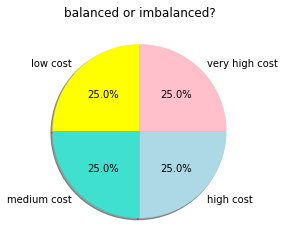

In [57]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = data['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()

Dataset is balanced as it should be in life

# **Exploratory Data analysis**

> Lets deep more into the data and understand the dataset by exploring all columns one by one with the help of visualization. It will help us in understanding and building models.

> We will explore each columns and compare with our dependent variable i.e., Price range and see how they are related to each other. It will help us in analyzing which variables are the main factors in pricing of mobiles.





**Battery Power**

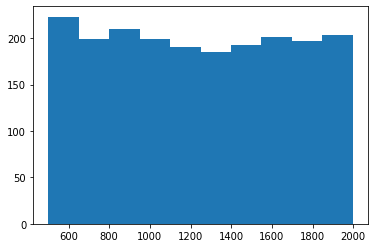

In [58]:
plt.hist(data['battery_power'])
plt.show()

Low power batteries are slightly more in count.

**Price Range**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


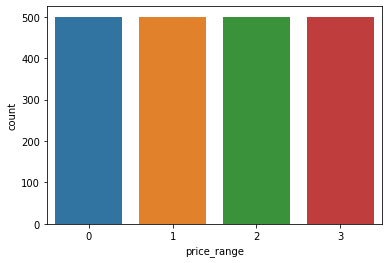

In [59]:
sns.countplot(data['price_range'])
plt.show()

Its quite a uniform data. Data is split equally across all ranges.

**Clock Speed**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


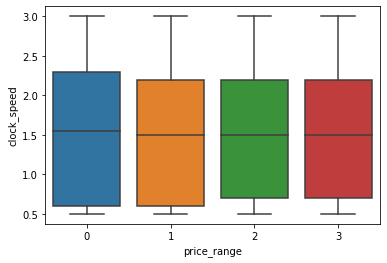

In [60]:
sns.boxplot(data['price_range'],data['clock_speed'])

Variance of clock speed is slightly more for mobiles in Category '0'

**Dual Sim**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


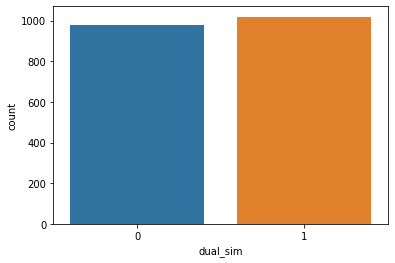

In [61]:
sns.countplot(data['dual_sim'])
plt.show()

Slightly more number of phones have dual sim

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


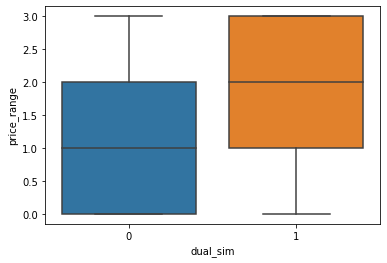

In [62]:
sns.boxplot(data['dual_sim'],data['price_range'])

Price Range of dual sim phones are considerably higher. This Denotes that Dual sim plays an important role in classification

**Fc - Front Camera mega pixels**

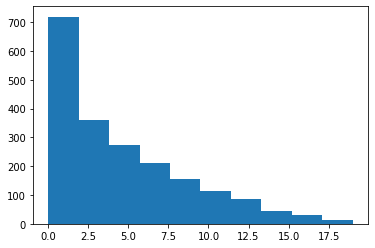

In [63]:
plt.hist(data['fc'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


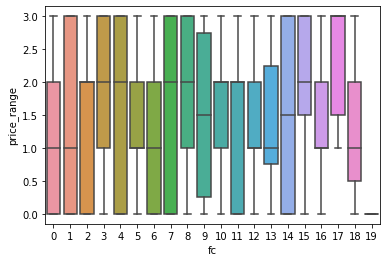

In [64]:
sns.boxplot(data['fc'],data['price_range'])
plt.show()

This Shows price range and fc have less correlation

**Four_g**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


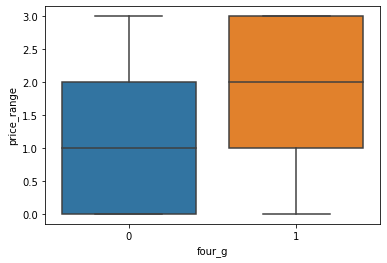

In [65]:
sns.boxplot(data['four_g'],data['price_range'])
plt.show()

Price Range of 4G phones are considerably higher. This Denotes that 4G plays an important role in classification

**Int_memory - Internal Memory in Gigabytes**

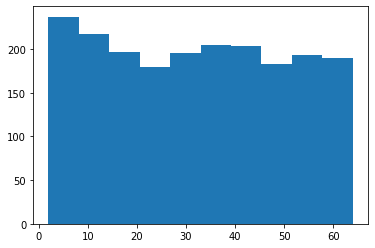

In [66]:
plt.hist(data['int_memory'])
plt.show()

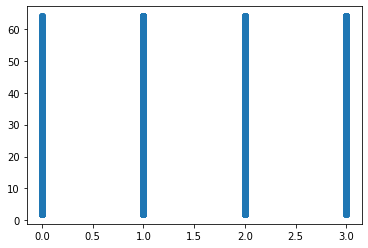

In [67]:
plt.scatter(data['price_range'],data['int_memory'])
plt.show()

**Mobile weight**

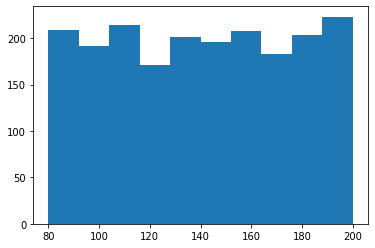

In [68]:
plt.hist(data['mobile_wt'])
plt.show()

Almost evenly spread across data set

**N_cores - Number of cores of processor**

In [69]:
data['n_cores'].unique()

array([2, 3, 5, 6, 1, 8, 4, 7])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


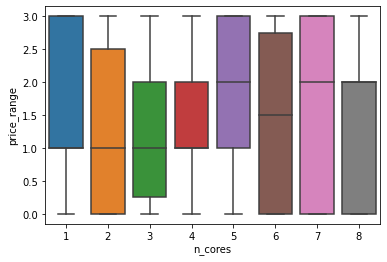

In [70]:
sns.boxplot(data['n_cores'],data['price_range'])
plt.show()

In [71]:
data.loc[(data['price_range']==0) & (data['n_cores']==8)]['n_cores'].count()

67

67 mobiles in Price range of 0 is having 8 Cores

**RAM**

In [72]:
len(data['ram'].unique())

1562

Too many different values for RAM

**Sc_h - Screen Height of mobile in cm**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


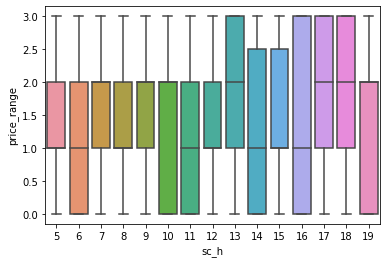

In [73]:
sns.boxplot(data['sc_h'],data['price_range'])
plt.show()

Some screen sizes are in high price range

**Sc_w - Screen Width of mobile in cm**

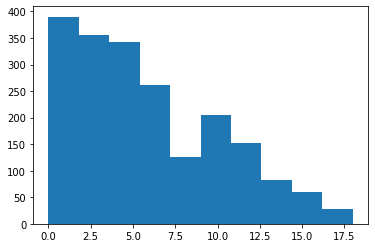

In [74]:
plt.hist(data['sc_w'])
plt.show()

Width ranges mostly in 0-7

**Talk_time**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


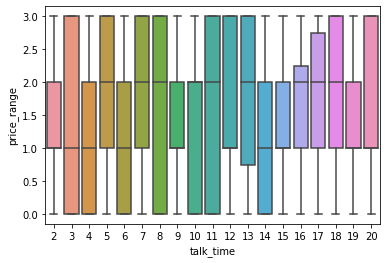

In [75]:
sns.boxplot(data['talk_time'],data['price_range'])
plt.show()

**Three_g**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


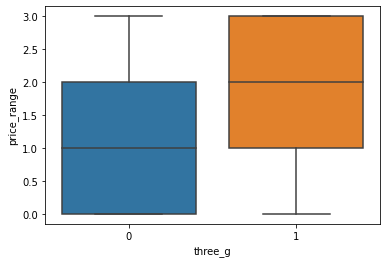

In [76]:
sns.boxplot(data['three_g'],data['price_range'])
plt.show()

Price Range of 3G phones are considerably higher. This Denotes that 3G plays an important role in classification

**Touch Screen**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


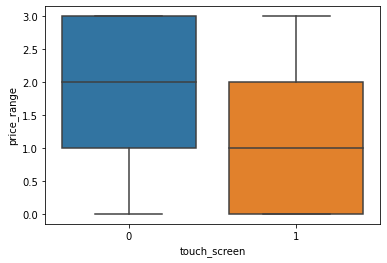

In [77]:
sns.boxplot(data['touch_screen'],data['price_range'])
plt.show()

Price Range of touch screen phone is low.. Quite strange considering all the 4G,3G and Wifi phones are in higher price range

**Wifi**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


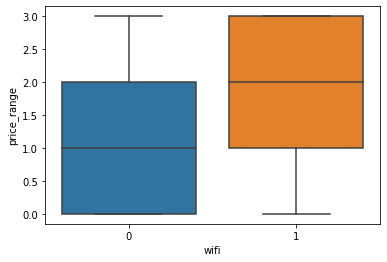

In [78]:
sns.boxplot(data['wifi'], data['price_range'])
plt.show()

Price Range of wifi phones are considerably higher. This Denotes that wifi plays an important role in classification

# **Split Data**

Before training our model on the dataset, we need to split the dataset into training and testing datasets. This is required to train our model on the major part of our dataset and test the accuracy of the model on the minor part. Let's split it



In [79]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)

This will divide our dataset randomly with a ratio of 80/20

Lets check whether the split works correctly 

In [80]:
print(x_train.shape)
print(x_valid.shape)

(1600, 20)
(400, 20)


Great! So we have 1600 data for training and 400 data for testing

# **Correlation**

Before going through machine learning applications, let's see the correlation between features and target variable by plotting heatmap:



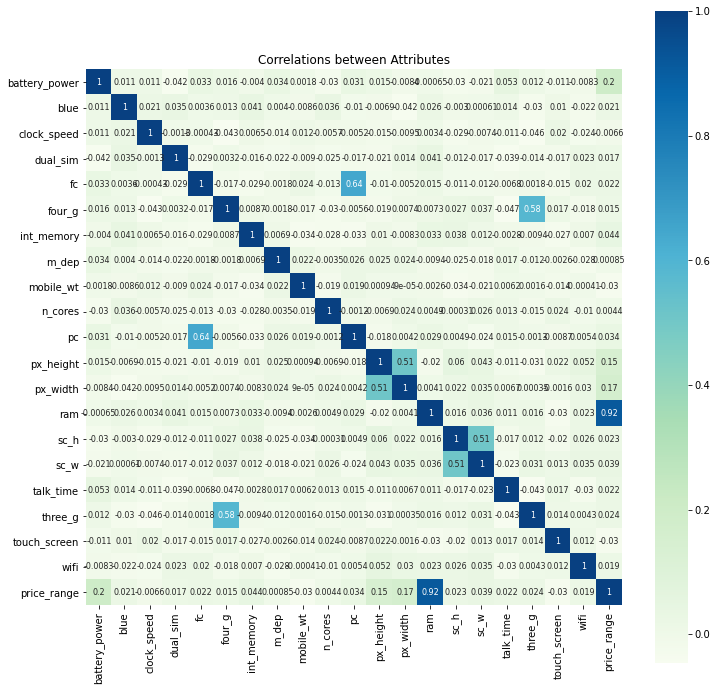

In [81]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

**Observations from the heatmap:**

*   The most influential variable is ram
*   Most of the variables have very little correlation to price range

*   Primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect prige range.
*   Having 3G and 4G is somewhat correlated

There is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

# **Implementation of ML Algorithms**

To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set

*   Logistic Regression
*   Decision Tree

*   Random Forest
*   KNN





# **Logistic Regression**

Target variables of the data set are discrete, hence, we are going to apply multiclass logistic regression model.

In [82]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
y_pred_lr = lr.predict(x_valid)

After building a logistic regression model, now, we are going to measure the performance of the model by means of confusion matrix:

In [84]:
confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_lr)
confusion_matrix

array([[88, 11,  1,  0],
       [ 8, 64, 25,  3],
       [ 0, 13, 58, 29],
       [ 0,  1, 17, 82]])

In [85]:
acc_lr = metrics.accuracy_score(y_valid, y_pred_lr)
acc_lr

0.73

# **Decision Tree**




Decision tree is one of the most popular supervised learning algorithm that is mostly used in classification problems.

In [86]:
dt = DecisionTreeClassifier(random_state=101)
dt_model = dt.fit(x_train, y_train)

In [87]:
y_pred_dt = dt.predict(x_valid)

In [88]:
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

After building a decision tree model, now, we are going to measure the performance of the model by means of confusion matrix:

In [89]:
print(metrics.confusion_matrix(y_valid, y_pred_dt))

[[89 11  0  0]
 [ 7 74 19  0]
 [ 1  9 80 10]
 [ 0  0 12 88]]


Even though precision and recall are good measures for imbalanced data, we can touch on these concepts here:

In [90]:
print(metrics.classification_report(y_valid, y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.79      0.74      0.76       100
           2       0.72      0.80      0.76       100
           3       0.90      0.88      0.89       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



How do we interpret the numbers in classification report?

Precision and recall metrices should be high as possible. They gives us accuracy level out of different classes.

We use f1-score to compare models that have different precision and recall levels.





In [91]:
acc_dt = metrics.accuracy_score(y_valid, y_pred_dt)
acc_dt

0.8275

# **Random Forest**

Random forest is a type of ensemble method of machine learning. It deals with overfitting problem and increase accuracy compared to a simple decision tree model.

In [92]:
rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy', oob_score = True) 
model_rf = rf.fit(x_train, y_train)

In [93]:
y_pred_rf = rf.predict(x_valid)

In [94]:
print(metrics.confusion_matrix(y_valid, y_pred_rf))

[[91  9  0  0]
 [ 3 91  6  0]
 [ 0  7 85  8]
 [ 0  0  6 94]]


In [95]:
# Create confusion matrix
pd.crosstab(y_valid, y_pred_rf, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,91,9,0,0
1,3,91,6,0
2,0,7,85,8
3,0,0,6,94


In [96]:
acc_rf = metrics.accuracy_score(y_valid, y_pred_rf)
acc_rf

0.9025

We see that accuracy score in random forest model is higher than decision tree accuracy score.

# **K-Nearest Neighbors (KNN)**

'K' is the number of nearest training points which we classify them using the majority vote.

In [97]:
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [98]:
y_pred_knn = model_knn.predict(x_valid)

In [99]:
print(metrics.confusion_matrix(y_valid, y_pred_knn))

[[94  6  0  0]
 [ 3 96  1  0]
 [ 0  3 92  5]
 [ 0  0  7 93]]


In [100]:
print(accuracy_score(y_valid, y_pred_knn))

0.9375


In the first try, we did not know the optimum 'k'.
Let's find the optimum 'k' value via Grid Search method and run knn model with this 'k'.

In [101]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(x_train, y_train)
model.best_params_

{'n_neighbors': 9}

**After finding optimum k number, we will run our model again with k=9.**

In [102]:
model_knn = KNeighborsClassifier(n_neighbors=9)  
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [103]:
y_pred_knn = model_knn.predict(x_valid)

In [104]:
print(metrics.confusion_matrix(y_valid, y_pred_knn))

[[95  5  0  0]
 [ 2 96  2  0]
 [ 0  3 94  3]
 [ 0  0  6 94]]


In [105]:
acc_knn = accuracy_score(y_valid, y_pred_knn)
acc_knn

0.9475

# **Conclusion**

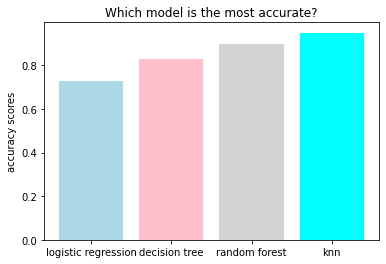

In [106]:
models = ['logistic regression', 'decision tree', 'random forest', 'knn']
acc_scores = [0.73, 0.83, 0.90, 0.95]

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

After training our dataset with four different model, we conclude that KNN is best model for our dataset. (via the highest accuracy score = 0.95)

Finally, we can run our KNN model to predict target values on the test dataset and add labels to dataset.

In [107]:
x_valid.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1391,794,0,2.5,1,15,0,14,0.6,197,3,19,312,1376,2171,19,8,18,0,0,1
362,1976,1,0.7,1,4,0,32,0.8,171,2,7,1301,1922,3699,17,11,13,0,1,1
923,1027,1,2.2,0,0,0,63,0.8,102,5,4,152,714,1732,8,5,13,0,1,1
1508,1554,0,2.8,1,7,0,23,0.1,105,6,18,699,1492,2184,13,9,20,1,0,1
233,1442,0,1.0,1,0,0,27,0.1,192,3,19,231,687,2227,6,5,20,1,1,0


In [108]:
predicted_price_range = model_knn.predict(x_valid)

In [109]:
predicted_price_range

array([1, 3, 1, 2, 1, 3, 0, 0, 1, 0, 1, 0, 0, 3, 1, 2, 2, 0, 1, 3, 3, 3,
       2, 1, 2, 1, 3, 2, 3, 2, 1, 1, 3, 2, 3, 2, 1, 0, 1, 2, 2, 3, 0, 1,
       0, 0, 1, 1, 0, 3, 3, 2, 0, 3, 1, 3, 0, 2, 3, 0, 3, 3, 0, 2, 1, 1,
       1, 3, 1, 3, 0, 2, 0, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 1, 1, 1, 3, 0,
       1, 3, 3, 3, 0, 1, 1, 1, 2, 0, 1, 3, 2, 3, 0, 1, 1, 2, 0, 2, 3, 2,
       2, 2, 0, 1, 2, 0, 3, 2, 2, 3, 0, 1, 1, 3, 0, 2, 3, 3, 0, 3, 1, 0,
       2, 0, 1, 1, 1, 0, 3, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 3, 0, 1, 2, 3,
       3, 3, 1, 0, 0, 2, 0, 1, 2, 2, 2, 3, 1, 3, 3, 2, 3, 2, 1, 3, 1, 0,
       2, 0, 0, 0, 3, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 3, 0, 3, 1, 2, 1, 2,
       2, 0, 0, 1, 1, 2, 2, 1, 2, 1, 3, 1, 3, 0, 0, 2, 2, 1, 1, 1, 0, 1,
       2, 2, 3, 0, 0, 3, 0, 3, 0, 1, 3, 0, 2, 1, 1, 0, 2, 0, 3, 0, 1, 1,
       3, 0, 2, 2, 0, 2, 1, 1, 2, 0, 3, 1, 3, 2, 2, 3, 1, 3, 0, 3, 3, 2,
       0, 3, 3, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 3, 1, 1, 0, 3, 0, 0, 2, 2,
       2, 3, 2, 2, 0, 0, 3, 1, 3, 1, 1, 1, 1, 2, 1,

In [110]:
x_valid['price_range'] = predicted_price_range

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
x_valid.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1391,794,0,2.5,1,15,0,14,0.6,197,3,19,312,1376,2171,19,8,18,0,0,1,1
362,1976,1,0.7,1,4,0,32,0.8,171,2,7,1301,1922,3699,17,11,13,0,1,1,3
923,1027,1,2.2,0,0,0,63,0.8,102,5,4,152,714,1732,8,5,13,0,1,1,1
1508,1554,0,2.8,1,7,0,23,0.1,105,6,18,699,1492,2184,13,9,20,1,0,1,2
233,1442,0,1.0,1,0,0,27,0.1,192,3,19,231,687,2227,6,5,20,1,1,0,1


**We have achieved our goal and predicted price ranges for mobile phones in our new dataset.**